In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
df = pd.read_csv('Data/tmdb_results_combined.csv.gz')

df.head(25)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,1979.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.851,47.0,R
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.111,158.0,R
7,tt0119495,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.000,0.0,R
8,tt0119806,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,85920.0,en,Nothing Sacred,...,0.0,98.0,[],Released,NaN,Nothing Sacred,0.0,0.000,0.0,NaN
9,tt0120202,0.0,/tuerGhZ1lA8wpBjUCEUpeTWDT5B.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.newline.com/properties/stateandmain...,21991.0,en,State and Main,...,0.0,102.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,Big movie. Small town. Huge trouble.,State and Main,0.0,6.424,164.0,NaN


# Client question 1: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

## Null hypothesis: There is no statistical difference in revenue between the different rating categories

## Alternate hypothesis: There is statistically significant differences in revenue between the different rating categories

## Alpha for this test will be .05

## Since we will be testing a single variable (revenue) across multiple groups (four to be exact) - we will use the ANOVA test

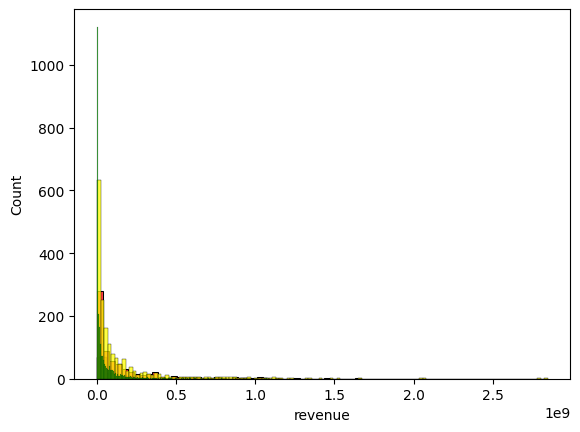

In [18]:
#First we need to create separate pandas series for revenues between the different ratings groups

g_df = df.loc[df['certification']=="G"]
g_revenues = g_df['revenue'].dropna()
g_revenues = g_revenues.loc[g_revenues > 0]
                            
pg_df = df.loc[df['certification']=="PG"]
pg_revenues = pg_df['revenue'].dropna()
pg_revenues = pg_revenues.loc[pg_revenues > 0] 

pg13_df = df.loc[df['certification']=="PG-13"]
pg13_revenues = pg13_df['revenue'].dropna()
pg13_revenues = pg13_revenues.loc[pg13_revenues > 0]

r_df = df.loc[df['certification']=="R"]
r_revenues = r_df['revenue'].dropna()
r_revenues = r_revenues.loc[r_revenues > 0]


sns.histplot(data=g_revenues)
sns.histplot(data=pg_revenues, color="red")
sns.histplot(data=pg13_revenues, color="yellow")
sns.histplot(data=r_revenues, color="green")
plt.show()

## Before we can run our ANOVA, we need to verify a few things about our data

## Verification 1 - No significant outliers

In [19]:
#Check G movies for outliers using z_score

g_zscores = stats.zscore(g_revenues)
g_outliers = abs(g_zscores)>3
np.sum(g_outliers)

4

In [20]:
#we have four outliers for G movies, let's remove them

g_revenues = g_revenues[(np.abs(stats.zscore(g_revenues))<3)]

In [21]:
#Check PG movies for outliers using z_score

pg_zscores = stats.zscore(pg_revenues)
pg_outliers = abs(pg_zscores)>3
np.sum(pg_outliers)

21

In [22]:
#Remove outliers from PG

pg_revenues = pg_revenues[(np.abs(stats.zscore(pg_revenues))<3)]

In [23]:
#Check PG-13 movies for outliers using z_score

pg13_zscores = stats.zscore(pg13_revenues)
pg13_outliers = abs(pg13_zscores)>3
np.sum(pg13_outliers)

42

In [24]:
#Remove outliers from PG-13

pg13_revenues = pg13_revenues[(np.abs(stats.zscore(pg13_revenues))<3)]

In [25]:
#Check R movies for outliers using z_score

r_zscores = stats.zscore(r_revenues)
r_outliers = abs(r_zscores)>3
np.sum(r_outliers)

53

In [26]:
#Remove outliers from R

r_revenues = r_revenues[(np.abs(stats.zscore(r_revenues))<3)]

## Verification 2 - Check for normality

In [27]:
#Check G for normality

g_normality = stats.normaltest(g_revenues)
g_normality

NormaltestResult(statistic=58.653585461260505, pvalue=1.83457615805827e-13)

In [28]:
#Check PG for normality

pg_normality = stats.normaltest(pg_revenues)
pg_normality

NormaltestResult(statistic=246.64908301481472, pvalue=2.759511066648394e-54)

In [29]:
#Check PG-13 for normality

pg13_normality = stats.normaltest(pg13_revenues)
pg13_normality

NormaltestResult(statistic=886.5491501930861, pvalue=3.078208744390665e-193)

In [30]:
#Check R for normality

r_normality = stats.normaltest(r_revenues)
r_normality

NormaltestResult(statistic=1120.0509631863304, pvalue=6.081680752806417e-244)

### All of our groups had p-values well below .05, which means NONE are normally distributed. Our sample sizes for all groups are in the thousands though, so we can continue with our ANOVA

## Verification 3 - Check for equal variance

In [31]:
variance_test = stats.levene(g_revenues, pg_revenues, pg13_revenues, r_revenues)
variance_test

LeveneResult(statistic=148.8826792795371, pvalue=2.799103074082618e-92)

### With a p-value of under .05, we can conclude that our groups do NOT have equal variance. This won't stop us from conducting our test, but we will need to switch it up and run a Kruskal-Wallis function instead


In [32]:
#Let's run our final test!

anova = stats.kruskal(g_revenues, pg_revenues, pg13_revenues, r_revenues)
anova

KruskalResult(statistic=610.5151320323973, pvalue=5.294456880802159e-132)

## RESULTS: With a p-value of well under .05, we must reject our null hypothesis and will conclude that there IS a statistically significant difference between revenues of the different ratings

In [37]:
#Let's make a quick visual to show our results
g_mean = g_revenues.mean()
pg_mean = pg_revenues.mean()
pg13_mean = pg13_revenues.mean()
r_mean = r_revenues.mean()


bar_df = pd.DataFrame([[g_mean,'G'],[pg_mean,'PG'],[pg13_mean,'PG-13'],[r_mean,'R']], columns=['Average_Revenue','Rating'])
bar_df

,Average_Revenue,Rating
0,9.527946e+07,G
1,1.222741e+08,PG
2,1.093631e+08,PG-13
3,3.266834e+07,R


C:\Users\jfabe\AppData\Local\Temp\ipykernel_11956\208006686.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


Text(0, 0.5, '')

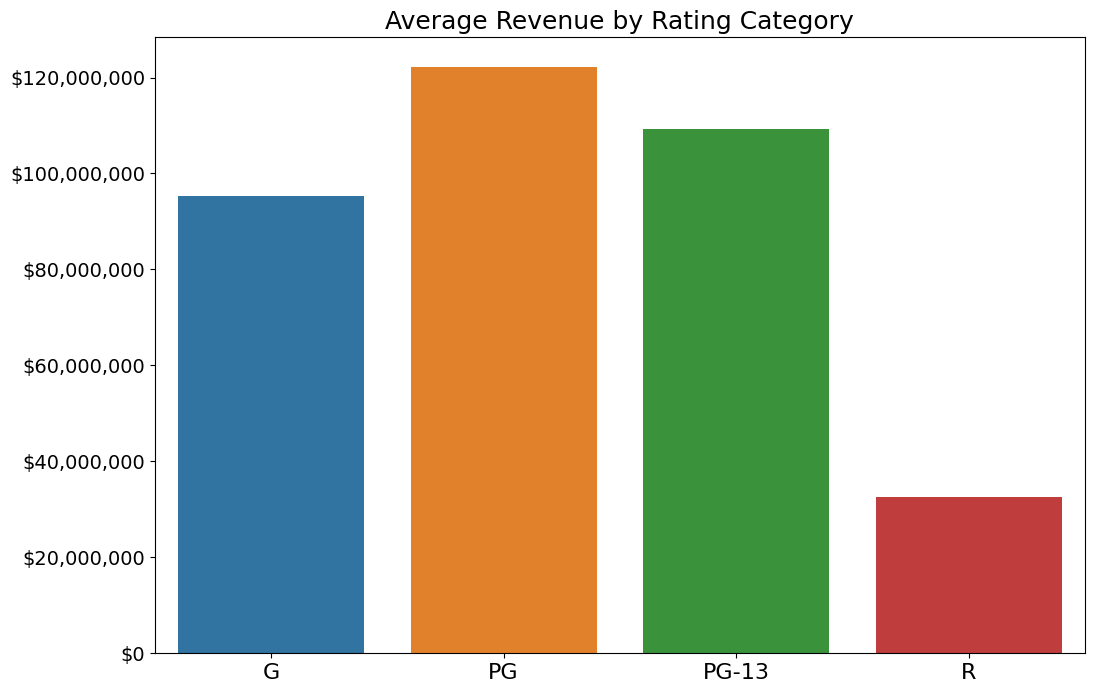

In [47]:
plt.figure(figsize=(12,8))
g = sns.barplot(data=bar_df, x='Rating',y='Average_Revenue')
ylabels = ['${:,.0f}'.format(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.title('Average Revenue by Rating Category', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')


## This visualization clearly shows that PG movies make the most overall revenue, followed closely by PG-13 and then G. Movies with a rating of "R" fall significantly below the other ratings in terms of total revenue

# Client question 2: do exceptionally long movies (over 150 minutes) earn more or less money than exceptionally short movies (under 90 minutes)?

## Null hypothesis: There is no statistical difference in revenue between long and short movies

## Alternate hypothesis: There is statistically significant differences in revenue between long and short movies

## Alpha for this test will be .05

## Since we will be testing a single variable (revenue) between just two groups we will use a simple T-Test

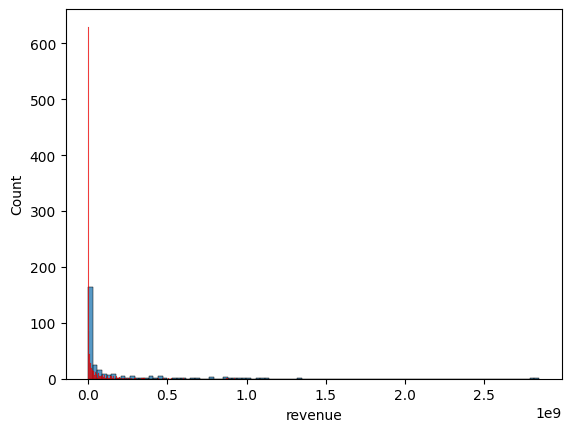

In [49]:
#Just like before, we will need to create separate pandas series for each group

long_df = df.loc[df['runtime']>150]
long_revenues = long_df['revenue'].dropna()
long_revenues = long_revenues.loc[long_revenues > 0] 
                            
short_df = df.loc[df['runtime']<90]
short_revenues = short_df['revenue'].dropna()
short_revenues = short_revenues.loc[short_revenues > 0] 

sns.histplot(data=long_revenues)
sns.histplot(data=short_revenues, color="red")
plt.show()

## We once again need to run through our assumption tests

## Test 1: No significant outliers

In [51]:
#Check long movies for outliers using z_score

long_zscores = stats.zscore(long_revenues)
long_outliers = abs(long_zscores)>3
np.sum(long_outliers)

3

In [52]:
#Remove our outliers

long_revenues = long_revenues[(np.abs(stats.zscore(long_revenues))<3)]

In [53]:
#Check short movies for outliers

short_zscores = stats.zscore(short_revenues)
short_outliers = abs(short_zscores)>3
np.sum(short_outliers)

23

In [54]:
#Remove short outliers

short_revenues = short_revenues[(np.abs(stats.zscore(short_revenues))<3)]

## Verification 2 - Check for normality

In [55]:
#Check long movies for normality

long_normality = stats.normaltest(long_revenues)
long_normality

NormaltestResult(statistic=148.77436731864182, pvalue=4.9437512702906526e-33)

In [56]:
#Check short movies for normality

short_normality = stats.normaltest(short_revenues)
short_normality

NormaltestResult(statistic=645.7009545478329, pvalue=6.135066013452859e-141)

### With a P-value for both below .05, we can conclude that neither group is normally distributed. With a very high sample count though, we can still continue with the test.

## Verification 3 - Check for equal variance

In [57]:
variance_test2 = stats.levene(long_revenues, short_revenues)
variance_test2

LeveneResult(statistic=172.4933012107492, pvalue=3.572229745481612e-37)

### With a p-value of under .05, we can conclude that our two samples do NOT have equal variance. This won't stop us from conducting our test, but we will need to set our equal_var to False when running it

## Now we can run our t-test!

In [58]:
t_test = stats.ttest_ind(long_revenues, short_revenues, equal_var = False)
t_test

Ttest_indResult(statistic=7.238553727982569, pvalue=4.3491444298642965e-12)

## RESULTS: With a p-value of well under .05, we can reject our null hypothesis and accept that there is clearly a statistically significant difference between the revenues of extremely short and extremely long movies!

In [60]:
#Let's show this with a simple visualization

short_mean = short_revenues.mean()
long_mean = long_revenues.mean()

bar2_df = pd.DataFrame([[short_mean,'Short Movies (<90 mins)'],[long_mean,'Long Movies (>150 mins)']], columns=['Average_Revenue','Length'])
bar2_df

,Average_Revenue,Length
0,2.109906e+07,Short Movies (<90 mins)
1,1.350477e+08,Long Movies (>150 mins)


C:\Users\jfabe\AppData\Local\Temp\ipykernel_11956\871788298.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


Text(0, 0.5, '')

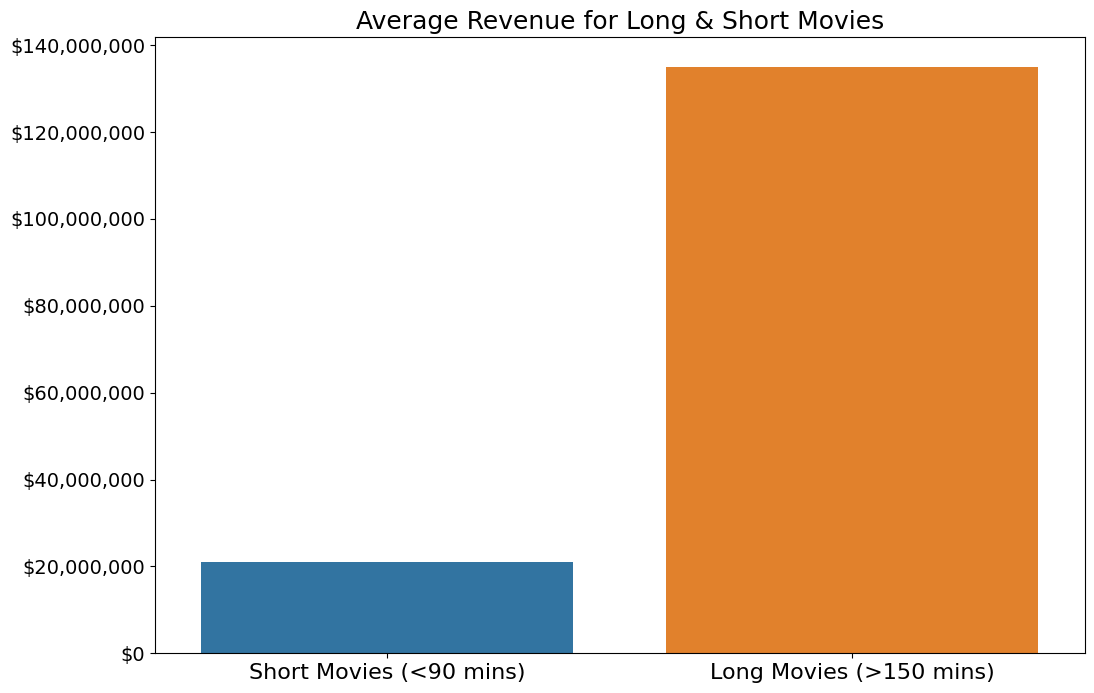

In [61]:
plt.figure(figsize=(12,8))
g = sns.barplot(data=bar2_df, x='Length',y='Average_Revenue')
ylabels = ['${:,.0f}'.format(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.title('Average Revenue for Long & Short Movies', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')


## This one isn't even close! We can see from this visualization that if you're looking to rake in the money, you're much better off making an exceptionally LONG movie (>150 minutes) than trying to squeak by with a really short one (<90 minutes), as there is a ONE HUNDRED MILLION DOLLAR difference between the two averages!

# Final client question 3: do movies released in English generate a significantly different revenue than those movies released in other languages?

## Null hypothesis: There is no statistical difference in revenue between movies released in English, and those released in other languages.

## Alternate hypothesis: There is statistically significant differences in revenue movies released in English, and those released in other languages.

## Alpha for this test will be .05

## Since we will once again be testing a single variable (revenue) between just two groups we will use a T-Test again

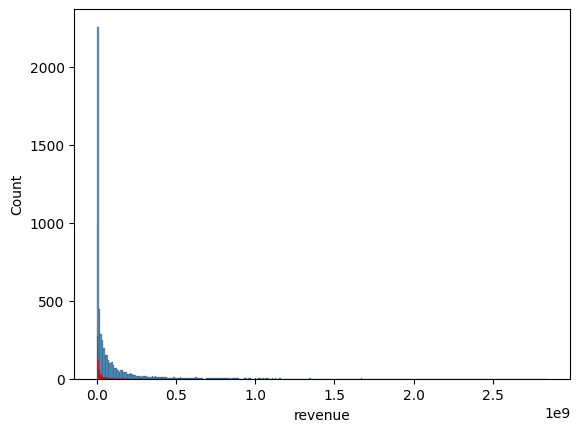

In [63]:
#Create separate pandas series for each group

english_df = df.loc[df['original_language']=="en"]
english_revenues = english_df['revenue'].dropna()
english_revenues = english_revenues.loc[english_revenues > 0] 
                            
non_english_df = df.loc[df['original_language']!="en"]
non_english_revenues = non_english_df['original_language'].dropna()
non_english_revenues = non_english_df['revenue'].dropna()
non_english_revenues = non_english_revenues.loc[non_english_revenues > 0] 

sns.histplot(data=english_revenues)
sns.histplot(data=non_english_revenues, color="red")
plt.show()

## Another run through our assumption tests!

## Test 1: No significant outliers

In [64]:
#Check English movies for outliers

english_zscores = stats.zscore(english_revenues)
english_outliers = abs(english_zscores)>3
np.sum(english_outliers)

135

In [65]:
#Remove our outliers

english_revenues = english_revenues[(np.abs(stats.zscore(english_revenues))<3)]

In [66]:
#Check non-English movies for outliers

non_english_zscores = stats.zscore(non_english_revenues)
non_english_outliers = abs(non_english_zscores)>3
np.sum(non_english_outliers)

38

In [67]:
#Remove our outliers

non_english_revenues = non_english_revenues[(np.abs(stats.zscore(non_english_revenues))<3)]

## Verification 2 - Check for normality

In [68]:
#Check English movies for normality

english_normality = stats.normaltest(english_revenues)
english_normality

NormaltestResult(statistic=2777.256601560509, pvalue=0.0)

In [69]:
#Check non-English movies for normality

non_english_normality = stats.normaltest(non_english_revenues)
non_english_normality

NormaltestResult(statistic=1811.6722129963302, pvalue=0.0)

### With a P-value for both below .05, we can conclude that neither group is normally distributed. We continue to run with high sample counts though, so we can easily continue with our test

## Verification 3 - Check for equal variance

In [72]:
variance_test3 = stats.levene(english_revenues, non_english_revenues)
variance_test3

LeveneResult(statistic=555.7027654274085, pvalue=1.1987075705644362e-118)

### With a p-value of under .05, we can conclude once again that our two samples do NOT have equal variance. We will again need to set our equal_var to False when running our T-Test.

## Let's run our final T-Test!

In [74]:
t_test = stats.ttest_ind(english_revenues, non_english_revenues, equal_var = False)
t_test

Ttest_indResult(statistic=31.96714233249518, pvalue=1.2190063696027977e-207)

## RESULTS: We are three for three! With a p-value of well under .05, we can reject our null hypothesis and accept that there is clearly a statistically significant difference between movies released in English, and those that are not. Let's make one final simple visualization to show this!

In [75]:
english_mean = english_revenues.mean()
non_english_mean = non_english_revenues.mean()

bar3_df = pd.DataFrame([[english_mean,'Movies Released in English'],[non_english_mean,'Movies Released non-English']], columns=['Average_Revenue','Language'])
bar3_df

,Average_Revenue,Language
0,6.457614e+07,Movies Released in English
1,1.339072e+07,Movies Released non-English


C:\Users\jfabe\AppData\Local\Temp\ipykernel_11956\3945102112.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


Text(0, 0.5, '')

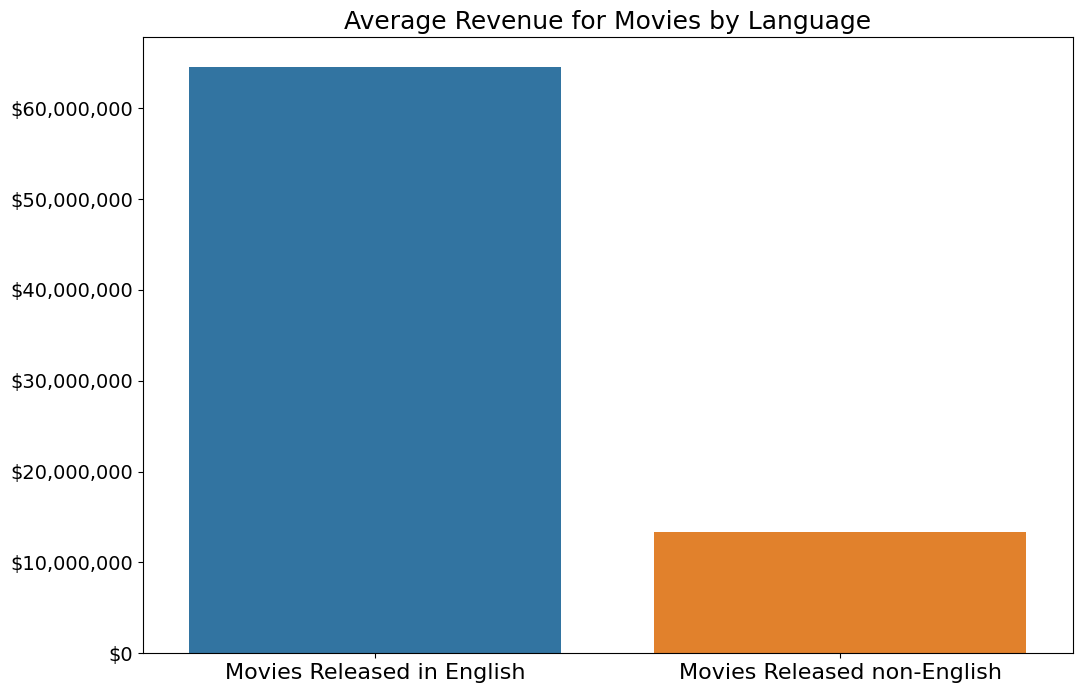

In [76]:
plt.figure(figsize=(12,8))
g = sns.barplot(data=bar3_df, x='Language',y='Average_Revenue')
ylabels = ['${:,.0f}'.format(y) for y in g.get_yticks()]
g.set_yticklabels(ylabels)
plt.title('Average Revenue for Movies by Language', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

## Our final visualization shows that our relationship is once again not even close! On average, movies released in English are generating over 60 million in revenue, while those released in other languages are barely above 10 million in revenue. English appears to be the best option when releasing new movies!